In [61]:
import os, sys, sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Load and look at the data

In [62]:
!ls OpticalDigits     # command line: check all files in Optical Digits

OpticalDigits.ipynb optdigits.tes       optdigits.tra


In [63]:
filepath_train = 'OpticalDigits/optdigits.tra'
filepath_test = 'OpticalDigits/optdigits.tes'

In [64]:
data_train = pd.DataFrame.from_csv(filepath_train, header = None, index_col = None) ###what is pd.Dataframe.from_csv
data_test = pd.DataFrame.from_csv(filepath_test, header = None, index_col = None)

In [65]:
print "Size of training set: %d"%len(data_train)
print "Size of test set: %d"%len(data_test)

Size of training set: 3823
Size of test set: 1797


In [66]:
#split the data into features and labels
train_x = data_train[data_train.columns[:64]]
train_y = data_train[data_train.columns[64]]
test_x = data_test[data_test.columns[:64]]
test_y = data_test[data_test.columns[64]]

Label: 0


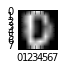

Label: 0


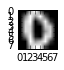

Label: 7


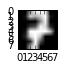

Label: 4


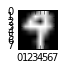

Label: 6


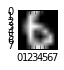

In [67]:
#verify that the data is correct
for i in range(5):
    print "Label: %d"%train_y[i]
    img = plt.figure()
    plt.imshow(train_x.loc[i].reshape((8,8)), cmap = cm.Greys_r)
    img.set_size_inches ((0.7, 0.7))
    plt.show()

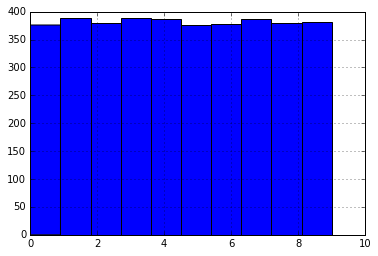

In [68]:
#look at the label distribution of the data
train_y.hist()

### 2. Train a simple model on the data

#### Nearest Neighbor (kNN, k=1)

In [69]:
# Reference: http://cs231n.github.io/classification/
import numpy as np

class NearestNeighbor:
  def __init__(self):
    pass

  def train(self, X, y):
    """ X is N x D where each row is an example. Y is 1-dimension of size N """
    # the nearest neighbor classifier simply remembers all the training data
    self.Xtr = X
    self.ytr = y

  def predict(self, X):
    """ X is N x D where each row is an example we wish to predict label for """
    num_test = X.shape[0]    # X.shape[0] gives row number, i.
    # lets make sure that the output type matches the input type
    Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

    # loop over all test rows
    for i in xrange(num_test):
      # find the nearest training image to the i'th test image
      # using the L1 distance (sum of absolute value differences)
      distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)
      min_index = np.argmin(distances) # get the index with smallest distance
      Ypred[i] = self.ytr[min_index] # predict the label of the nearest example

    return Ypred

In [70]:
knn = NearestNeighbor()
knn.train(train_x.as_matrix(), train_y.as_matrix())

In [71]:
test_x.head(5)  #same as test_x[:5]

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,0,6,13,10,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,0,11,16,10,0,0
2,0,0,0,4,15,12,0,0,0,0,...,5,0,0,0,0,3,11,16,9,0
3,0,0,7,15,13,1,0,0,0,8,...,9,0,0,0,7,13,13,9,0,0
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,0,2,16,4,0,0


***
See the result of the prediction
***

In [84]:
print "Predicting %d examples..."%len(test_x)
%time pred = knn.predict(test_x.as_matrix())

Predicting 1797 examples...
CPU times: user 3.25 s, sys: 907 ms, total: 4.16 s
Wall time: 6.05 s
CPU times: user 6 µs, sys: 5 µs, total: 11 µs
Wall time: 16 µs


In [73]:
import sklearn.metrics as metrics
print "Accuracy: %.2f"%metrics.accuracy_score(test_y, pred)


Accuracy: 0.97


In [74]:
print metrics.classification_report(test_y, pred)

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       178
          1       0.93      1.00      0.96       182
          2       0.99      0.99      0.99       177
          3       0.97      0.98      0.98       183
          4       0.98      0.98      0.98       181
          5       0.97      0.98      0.98       182
          6       0.99      0.99      0.99       181
          7       0.99      0.97      0.98       179
          8       0.98      0.91      0.95       174
          9       0.94      0.93      0.93       180

avg / total       0.97      0.97      0.97      1797



In [75]:
print metrics.confusion_matrix(test_y, pred)
print "X-axis: predicted, Y-axis: true"

[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   2 175   0   0   0   0   0   0   0]
 [  0   0   0 180   0   0   0   2   0   1]
 [  0   2   0   0 178   0   0   0   1   0]
 [  0   0   0   0   1 179   0   0   0   2]
 [  1   0   0   0   0   1 179   0   0   0]
 [  0   0   0   0   0   0   0 174   0   5]
 [  0  10   1   0   0   0   1   0 159   3]
 [  0   0   0   5   2   4   0   0   2 167]]
X-axis: predicted, Y-axis: true


***
Alternative method
***

In [76]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(train_x.as_matrix(), train_y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
dec = clf.predict(test_x)

In [78]:
print metrics.confusion_matrix(test_y, dec)
print "Accuracy: %.2f"%metrics.accuracy_score(test_y, dec)


[[ 99   0   0   0   0   0   0   0  79   0]
 [  0 113   0   0   0   0   0   0  69   0]
 [  0   0  80   0   0   0   0   0  97   0]
 [  0   0   0  98   0   0   0   0  85   0]
 [  0   0   0   0  88   0   0   0  93   0]
 [  0   0   0   0   0  81   0   0 101   0]
 [  0   0   0   0   0   0 108   0  73   0]
 [  0   0   0   0   0   0   0  66 113   0]
 [  0   0   0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0   0  77 103]]
Accuracy: 0.56
